In [1]:
#  I decided to treat this as a classification problem by creating a new
# binary
# variable affair (did the woman have at least one affair?) and trying
# to
# predict the classification for each woman.
# Dataset
# The dataset I chose is the affairs dataset that comes with
# Statsmodels. It
# was derived from a survey of women in 1974 by Redbook
# magazine, in
# which married women were asked about their participation in
# extramarital
# affairs. More information about the study is available in a 1978
# paper from
# the Journal of Political Economy.
# Description of Variables

# The dataset contains 6366 observations of 9 variables:
# rate_marriage: woman&#39;s rating of her marriage (1 = very poor, 5 =
# very good)
# age: woman&#39;s age
# yrs_married: number of years married
# children: number of children
# religious: woman&#39;s rating of how religious she is (1 = not religious,
# 4 =strongly religious)
# educ: level of education (9 = grade school, 12 = high school, 14 =
# some college, 16 = college graduate, 17 = some graduate school,
# 20
# = advanced degree)
# occupation: woman&#39;s occupation (1 = student, 2 = farming/semi-
# skilled/unskilled, 3 = &quot;white collar&quot;, 4 =
# teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =
# professional with advanced degree)
# occupation_husb: husband&#39;s occupation (same coding as above)
# affairs: time spent in extra-marital affairs

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)
import statsmodels.api as sm

In [3]:
data = sm.datasets.fair.load_pandas().data

## Data Cleaning & EDA

In [4]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [5]:
data.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0
6365,4.0,22.0,2.5,0.0,2.0,16.0,2.0,4.0,0.0


In [6]:
data.shape

(6366, 9)

In [7]:
# chacking information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


In [8]:
# Chech if there is a null value in data set
data.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [9]:
# check duplicet value in data or not
data.duplicated().sum()

1039

In [10]:
# droping duplicet valuesfrom data
data.drop_duplicates(inplace=True)

In [11]:
numerical_features = data.select_dtypes(exclude="object").columns

In [12]:
# fatch all unique value
for i in numerical_features:
    print(i,data[i].unique())

rate_marriage [3. 4. 5. 2. 1.]
age [32.  27.  22.  37.  42.  17.5]
yrs_married [ 9.  13.   2.5 16.5 23.   6.   0.5]
children [3.  0.  4.  1.  5.5 2. ]
religious [3. 1. 2. 4.]
educ [17. 14. 16. 12. 20.  9.]
occupation [2. 3. 5. 4. 1. 6.]
occupation_husb [5. 4. 3. 2. 6. 1.]
affairs [1.11111100e-01 3.23076920e+00 1.39999960e+00 7.27272700e-01
 4.66666600e+00 8.52173500e-01 1.82608600e+00 4.79999920e+00
 1.33333300e+00 3.26666450e+00 2.04166600e+00 4.84848400e-01
 2.00000000e+00 1.36111070e+00 7.83999630e+00 2.54545400e+00
 5.32608700e-01 6.22222200e-01 5.83333300e-01 1.66666600e-01
 6.15384600e-01 1.18787770e+00 1.11999989e+01 2.17777630e+00
 7.00000000e+00 5.21739100e-01 2.12121200e-01 4.00000000e-01
 3.19999980e+00 1.50769140e+00 4.89999960e+00 4.34783000e-02
 7.69231000e-02 2.92173860e+00 2.68799896e+01 6.06061000e-02
 8.88888800e-01 1.52173900e-01 9.42307700e-01 3.88888800e-01
 5.16923050e+00 1.69696900e+00 2.71515080e+00 1.11999998e+01
 7.46666720e+00 4.97777750e+00 2.69230700e-01 7.

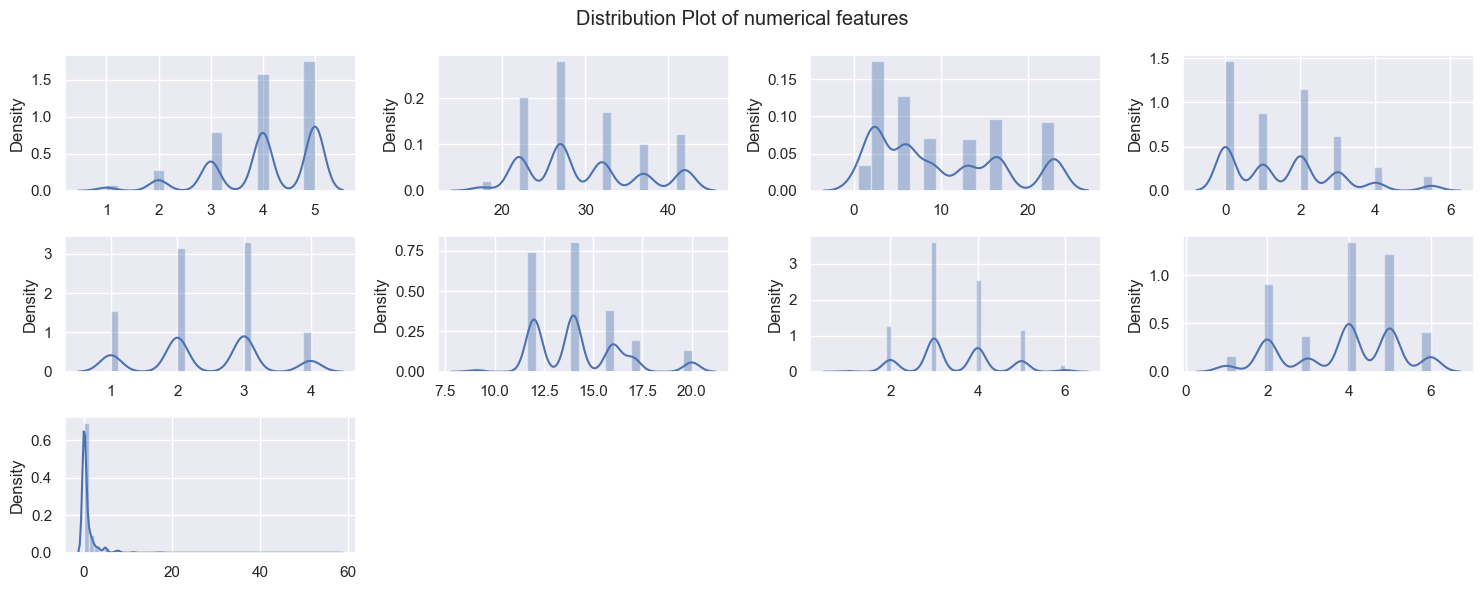

In [13]:
try:
    plt.suptitle("Distribution Plot of numerical features")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.distplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)         

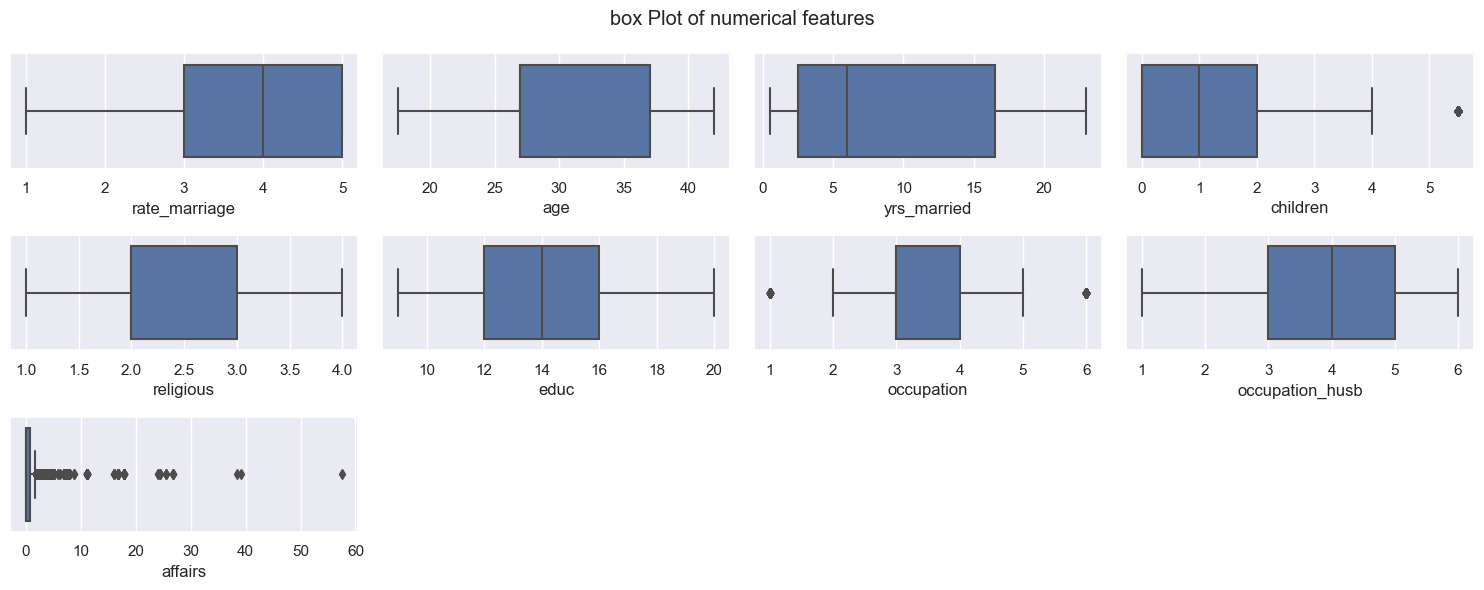

In [14]:
try:
    plt.suptitle("box Plot of numerical features")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.boxplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)         

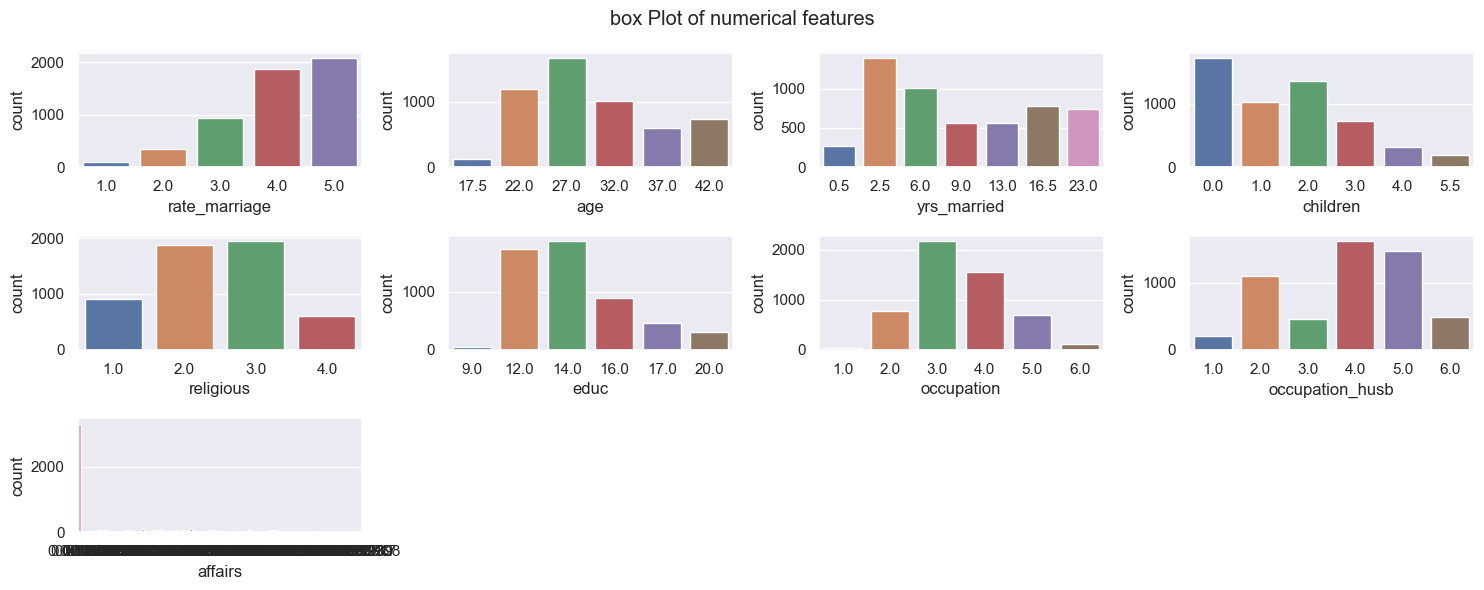

In [15]:
try:
    plt.suptitle("box Plot of numerical features")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.countplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)         

In [16]:
# rate_marriage: woman&#39;s rating of her marriage (1 = very poor, 5 =
# # very good)
rating = data.groupby("rate_marriage")["affairs"].mean().sort_values(ascending=False).reset_index()

<AxesSubplot:title={'center':'No of marrige_ratings and there affairs '}, xlabel='rate_marriage', ylabel='affairs'>

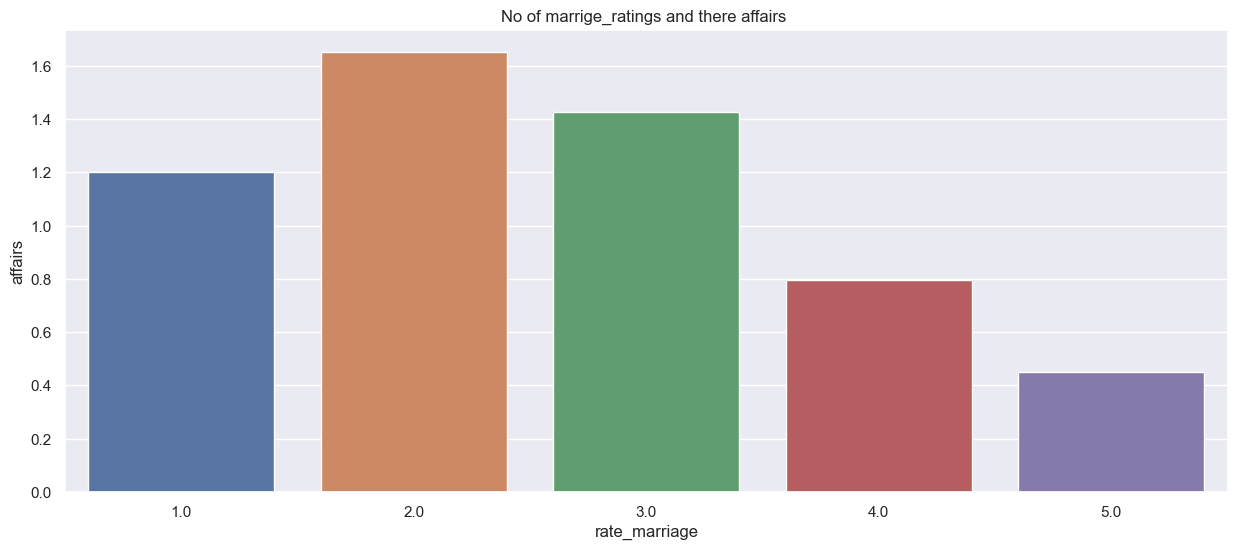

In [17]:
plt.title("No of marrige_ratings and there affairs ")
sns.barplot(x="rate_marriage",y="affairs",data=rating)

In [18]:
yrs_married = data.groupby("yrs_married")["affairs"].mean().sort_values(ascending=False).reset_index()

<AxesSubplot:title={'center':'No of yrs_married and there affairs '}, xlabel='yrs_married', ylabel='affairs'>

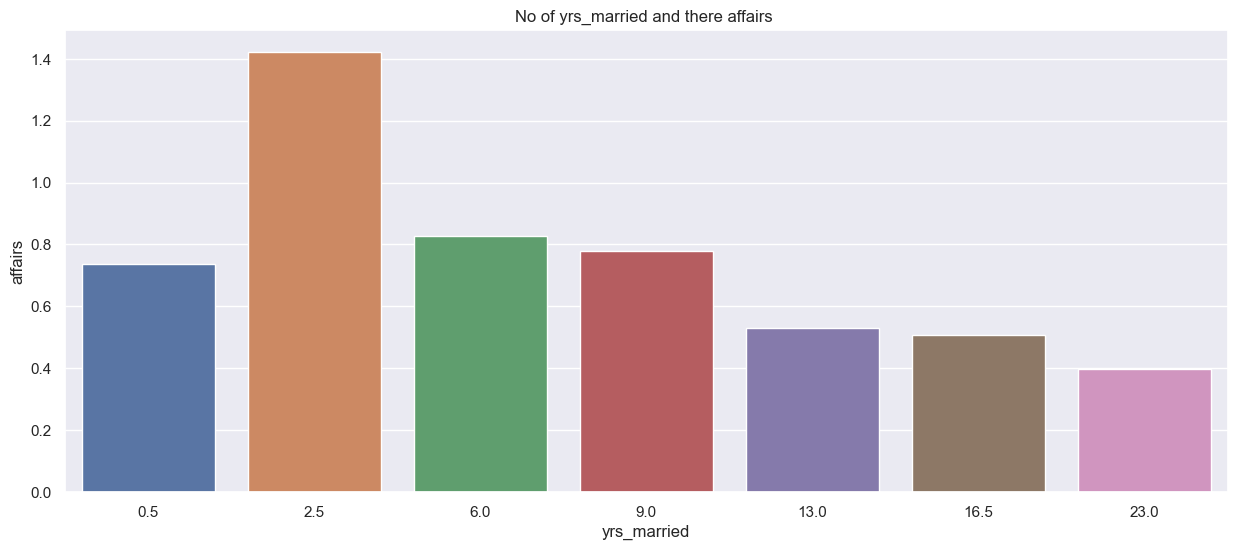

In [19]:
plt.title("No of yrs_married and there affairs ")
sns.barplot(x="yrs_married",y="affairs",data=yrs_married)

In [20]:
age = data.groupby("age")["affairs"].mean().sort_values(ascending=False).reset_index()

<AxesSubplot:title={'center':'No of age and there affairs '}, xlabel='age', ylabel='affairs'>

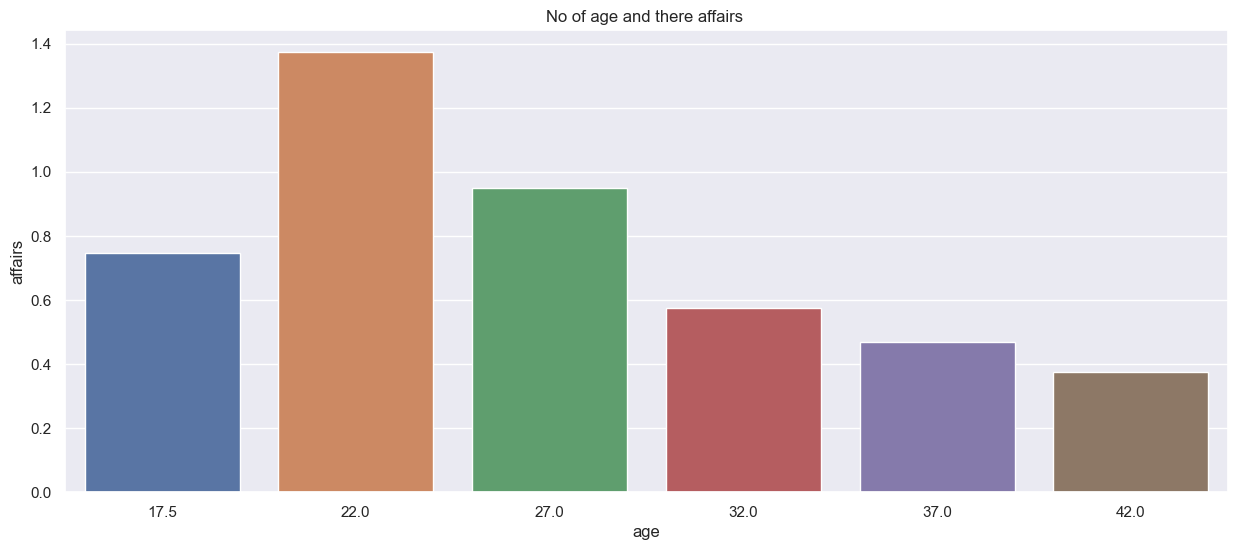

In [21]:
plt.title("No of age and there affairs ")
sns.barplot(x="age",y="affairs",data=age)

In [22]:
childrens = data.groupby("children")["affairs"].mean().sort_values(ascending=False).reset_index()

<AxesSubplot:title={'center':'No of children and there affairs '}, xlabel='children', ylabel='affairs'>

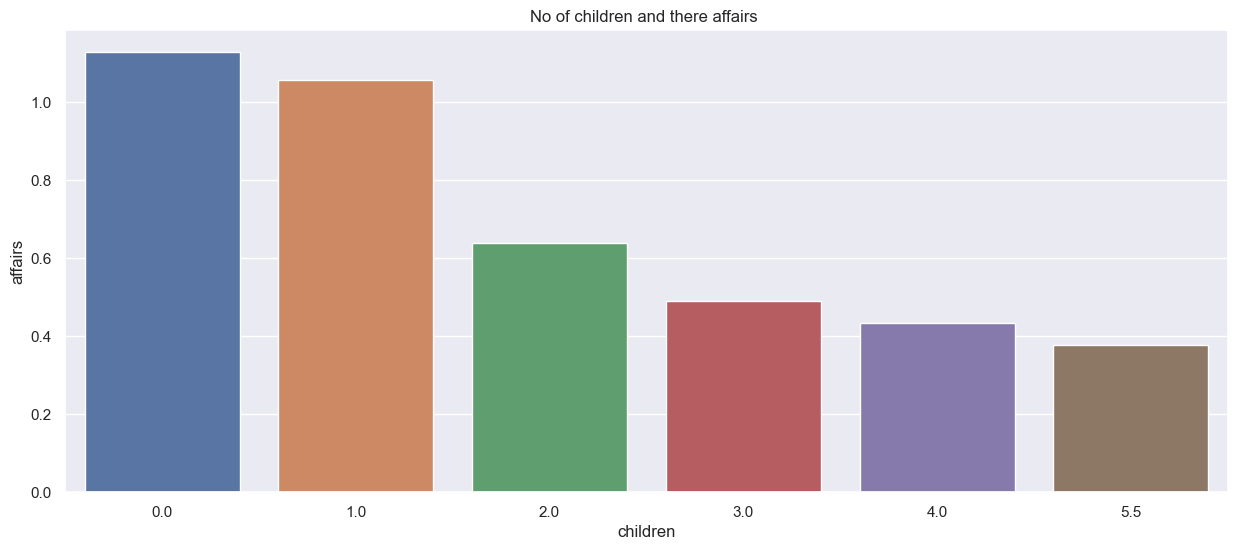

In [23]:
plt.title("No of children and there affairs ")
sns.barplot(x="children",y="affairs",data=childrens)

In [24]:
#religious: woman&#39;s rating of how religious she is (1 = not religious,
# 4 =strongly religious)
religious = data.groupby("religious")["affairs"].mean().sort_values(ascending=False).reset_index()

<AxesSubplot:title={'center':'No of religious and there affairs '}, xlabel='religious', ylabel='affairs'>

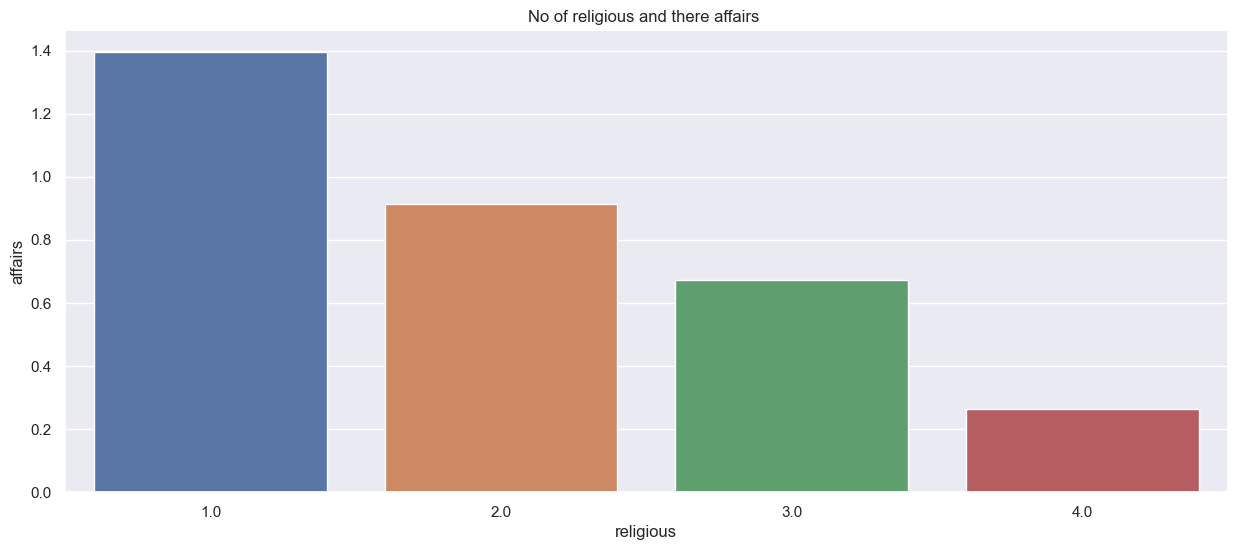

In [25]:
plt.title("No of religious and there affairs ")
sns.barplot(x="religious",y="affairs",data=religious)

In [26]:
#occupation: woman&#39;s occupation (1 = student, 2 = farming/semi-
# skilled/unskilled, 3 = &quot;white collar&quot;, 4 =
# teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =
# professional with advanced degree)
occupation = data.groupby("occupation")["affairs"].mean().sort_values(ascending=False).reset_index()

<AxesSubplot:title={'center':'occupation and there affairs '}, xlabel='occupation', ylabel='affairs'>

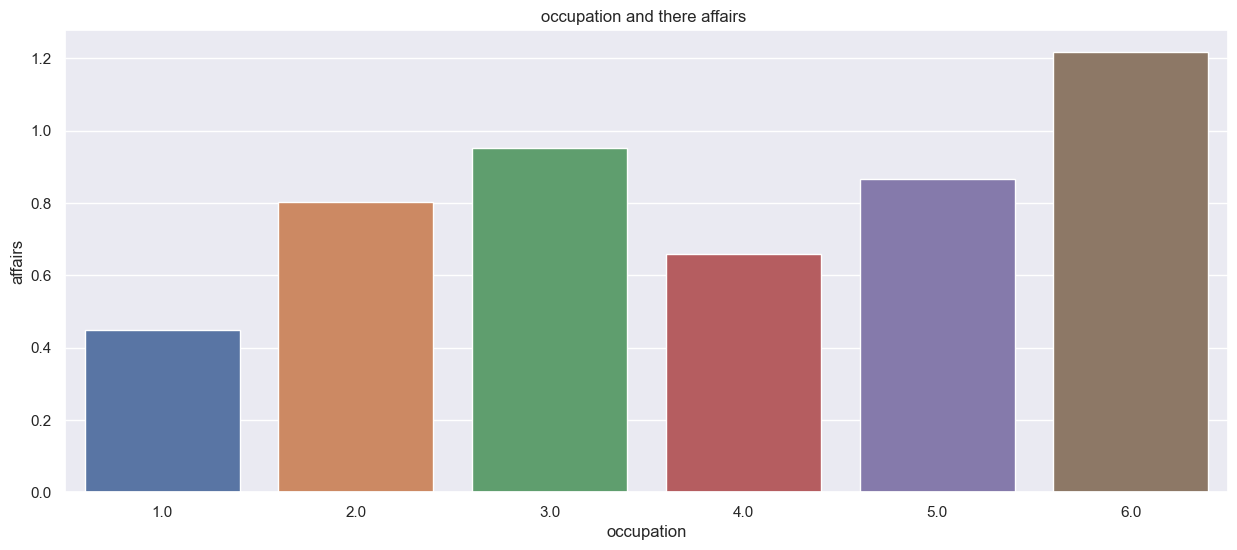

In [27]:
plt.title("occupation and there affairs ")
sns.barplot(x="occupation",y="affairs",data=occupation)

In [28]:
#occupation (1 = student, 2 = farming/semi-
# skilled/unskilled, 3 = &quot;white collar&quot;, 4 =
# teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =
# professional with advanced degree)
occupation_husb = data.groupby("occupation_husb")["affairs"].mean().sort_values(ascending=False).reset_index()

<AxesSubplot:title={'center':'occupation_husb and there affairs '}, xlabel='occupation_husb', ylabel='affairs'>

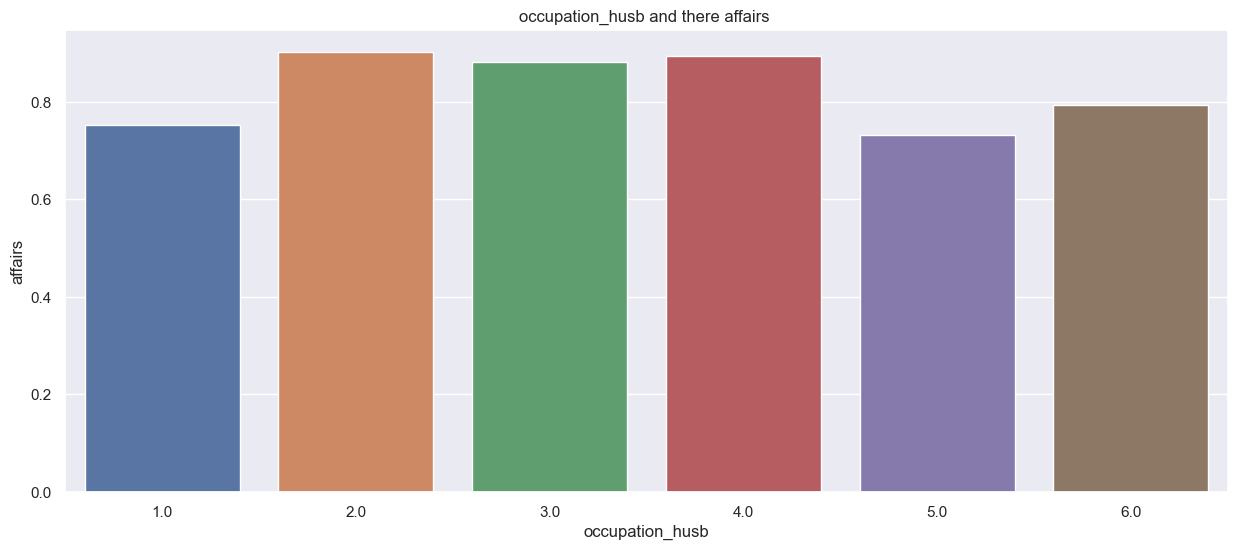

In [29]:
plt.title("occupation_husb and there affairs ")
sns.barplot(x="occupation_husb",y="affairs",data=occupation_husb)

In [30]:
def affairs(x):
    if x >0:
        return 1
    else:
        return 0

In [31]:
data["affairs"] = data["affairs"].apply(affairs)

<AxesSubplot:>

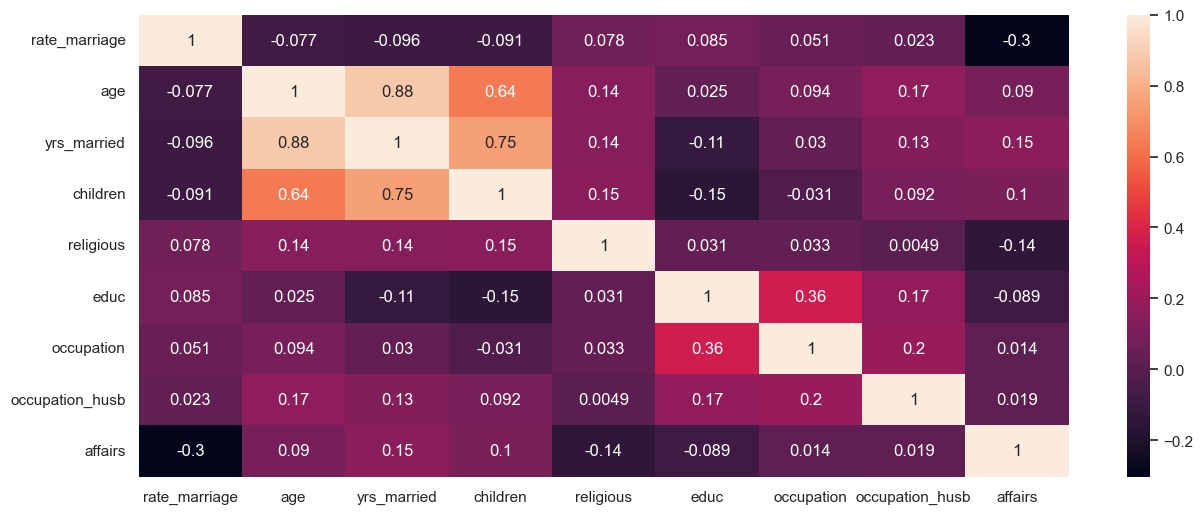

In [32]:
sns.heatmap(data.corr(),annot=True)

## Model Traning

In [33]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [34]:
# sageragrate dependent and indipendent features
x = data.drop("affairs",axis=1)
y = data["affairs"]

In [35]:
numerical_features = x.select_dtypes(exclude="object").columns
print(numerical_features)

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb'],
      dtype='object')


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
#pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [37]:
# numerical pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

# preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features)
])

In [38]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4261, 8)
(4261,)
(1066, 8)
(1066,)


In [40]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

In [42]:
def performance_metrices(test,predict):
    try:
        confusionmetrix = print(f"CONFUSION_METRIX: {confusion_matrix(test,predict)}")
        pre = print(f"PRECISION_SCORE: {precision_score(test,predict)}")
        recall = print(f"RECALL_SCORE: {recall_score(test,predict)}")
        f1score = print(f"F1_SCORE: {f1_score(test,predict)}")
        accuracyscore = print(f"ACCURACY_SCORE: {accuracy_score(test,predict)}")
        return confusionmetrix,pre,recall,f1score,accuracyscore
    except Exception as e:
        print(e)

In [43]:
logistic = LogisticRegression()

In [44]:
logistic.fit(X_train,y_train)

LogisticRegression()

In [45]:
logistic.score(X_train,y_train)

0.6819995306266134

In [46]:
y_predict = logistic.predict(X_test)

In [47]:
performance_metrices(y_test,y_predict)

CONFUSION_METRIX: [[561  90]
 [247 168]]
PRECISION_SCORE: 0.6511627906976745
RECALL_SCORE: 0.40481927710843374
F1_SCORE: 0.49925705794947994
ACCURACY_SCORE: 0.6838649155722326


(None, None, None, None, None)